# Analysing topic model evaluation metrics

In [1]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

from itertools import combinations
from itertools import chain

metric_names = ['c_npmi', 'c_uci', 'c_v', 'c_w2v', 'perplexity', 'u_mass']
param_names = ['alpha', 'beta', 'num_topics']

### Load saved metrics

In [2]:
with open('../data/lee-metrics.json') as f:
    models = json.load(f)

df = pd.DataFrame(models)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,num_topics,perplexity,u_mass
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998271,5,-6.246609,-2.393090
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998870,10,-6.302226,-2.233028
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998861,15,-6.363658,-2.439774
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998939,20,-6.402373,-2.509307
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998332,5,-6.038808,-2.413199


### Add ranks of absolute metric values

In [3]:
metric_names_with_ranks = [m + '-rank' for m in metric_names]
df[metric_names_with_ranks] = df[metric_names].rank()
df['mean_rank'] = df[metric_names_with_ranks].mean(axis=1)
df['best_rank'] = df[metric_names_with_ranks].max(axis=1)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998271,5,-6.246609,-2.393090,58.0,46.0,42.0,11.0,34.0,32.0,37.166667,58.0
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998870,10,-6.302226,-2.233028,40.0,32.0,59.0,45.0,24.0,41.0,40.166667,59.0
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998861,15,-6.363658,-2.439774,24.0,24.0,36.0,43.0,20.0,20.0,27.833333,43.0
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998939,20,-6.402373,-2.509307,17.0,16.0,26.0,52.0,18.0,14.0,23.833333,52.0
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998332,5,-6.038808,-2.413199,54.0,40.5,43.5,17.0,56.0,24.0,39.166667,56.0


### Project metrics into 2D space, color with mean rank

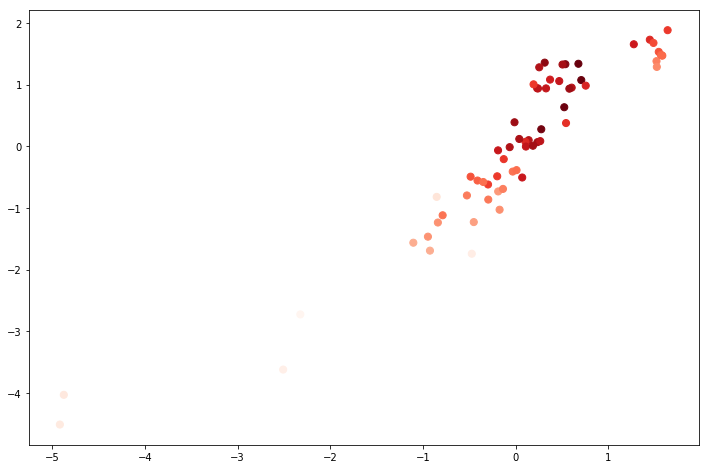

In [4]:
coords = manifold.MDS(random_state=0).fit_transform(df[metric_names].values)
plt.figure(figsize=(12,8))
plt.scatter(coords[:,0], coords[:,1], s=50, c=df['mean_rank'], cmap='Reds')

In [5]:
df['coords'] = [tuple(c) for c in coords]
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank,coords
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998271,5,-6.246609,-2.393090,58.0,46.0,42.0,11.0,34.0,32.0,37.166667,58.0,"(0.37200974811781795, 1.081315362441949)"
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998870,10,-6.302226,-2.233028,40.0,32.0,59.0,45.0,24.0,41.0,40.166667,59.0,"(0.14137419365762005, 0.09896719769066938)"
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998861,15,-6.363658,-2.439774,24.0,24.0,36.0,43.0,20.0,20.0,27.833333,43.0,"(-0.030944143678221767, -0.41066026069995804)"
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998939,20,-6.402373,-2.509307,17.0,16.0,26.0,52.0,18.0,14.0,23.833333,52.0,"(-0.18770660521327487, -0.7328761872744652)"
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998332,5,-6.038808,-2.413199,54.0,40.5,43.5,17.0,56.0,24.0,39.166667,56.0,"(0.24179325401755777, 0.9375419602942165)"


### Look at Spearman correlation between the metrics

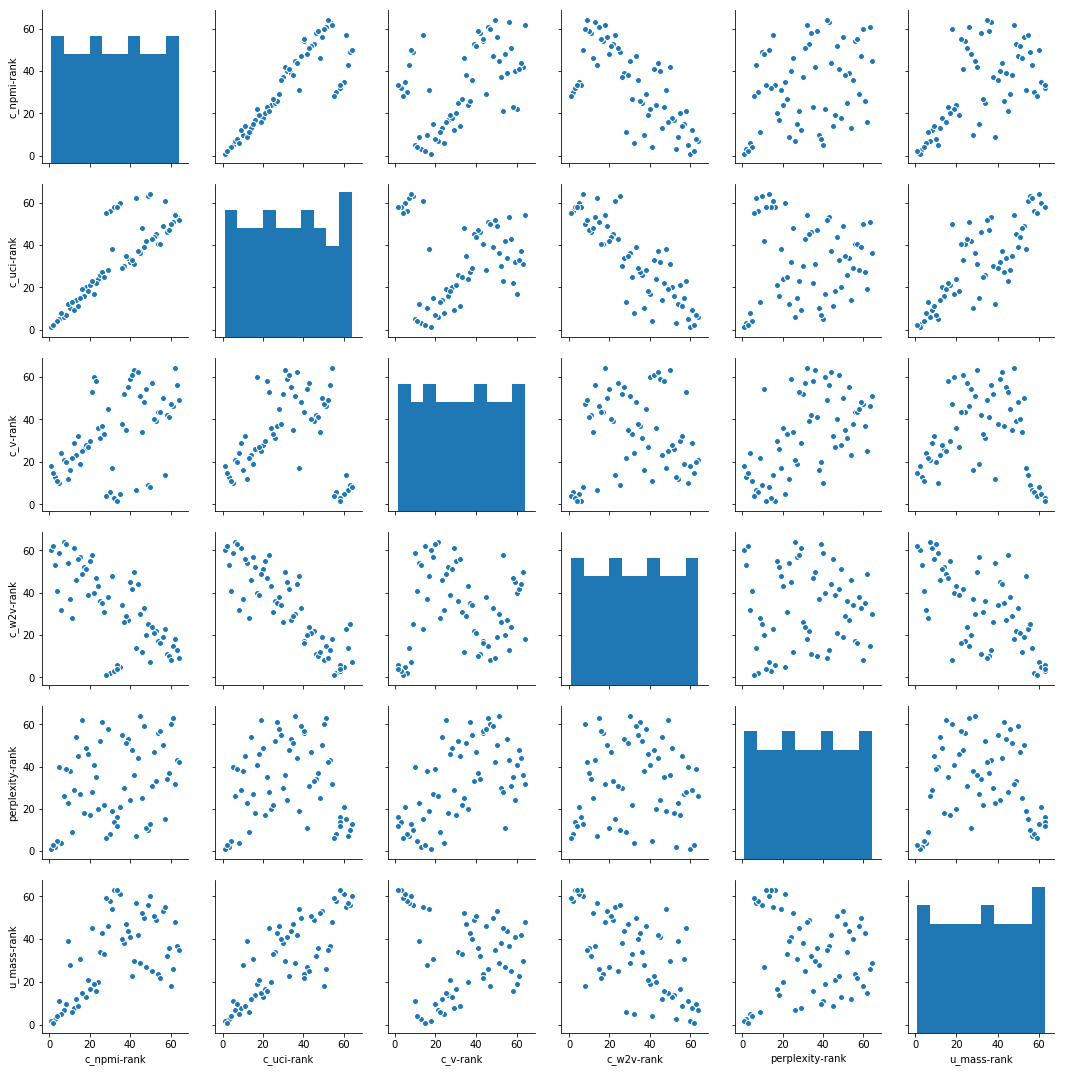

In [6]:
sns.pairplot(df[metric_names_with_ranks])

Some are correlated, most are not. Let's look at the values.

In [7]:
df[metric_names].corr('spearman')

,c_npmi,c_uci,c_v,c_w2v,perplexity,u_mass
c_npmi,1.000000,0.842938,0.480465,-0.717682,0.328804,0.566836
c_uci,0.842938,1.000000,0.040365,-0.866464,0.011470,0.820094
c_v,0.480465,0.040365,1.000000,0.036791,0.564047,-0.102159
c_w2v,-0.717682,-0.866464,0.036791,1.000000,0.017537,-0.654197
perplexity,0.328804,0.011470,0.564047,0.017537,1.000000,-0.043363
u_mass,0.566836,0.820094,-0.102159,-0.654197,-0.043363,1.000000


### Subgroup correlation analysis

In [8]:
def compute_corr_group(df, param):
    '''
    Group the dataframe by the given param and perform correlation.
    Return an array of objects:
    - condition: [(param, value)]
    - variables: (var1, var2)
    - coeff: correlation coefficient
    - diff: difference between the coefficient of the entire dataset and the group
    '''
    results = []
    gloabl_corr_df = df[metric_names].corr('spearman')
    for k, g in df.groupby(param):
        corr_df = g[metric_names].corr('spearman')
        
        for var1, var2 in combinations(metric_names, 2):
            results.append({ 
                'condition': [(param, k)],
                'variables': (var1, var2),
                'coeff': corr_df[var1][var2],
                'diff': corr_df[var1][var2] - gloabl_corr_df[var1][var2]
            })

    return results

In [9]:
def compute_overall_corr(df):
    results = []
    corr_df = df[metric_names].corr('spearman')

    for var1, var2 in combinations(metric_names, 2):
        results.append({ 
            'condition': None,
            'variables': (var1, var2),
            'coeff': corr_df[var1][var2],
            'diff': 0
        })

    return results

In [10]:
all_corrs = list(chain.from_iterable([compute_corr_group(df, param) for param in param_names]))
all_corrs = list(chain.from_iterable([all_corrs, compute_overall_corr(df)]))
corr_df = pd.DataFrame(all_corrs)
corr_df.head()

,coeff,condition,diff,variables
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
1,0.729412,"[(alpha, 0.01)]",0.248947,"(c_npmi, c_v)"
2,-0.858824,"[(alpha, 0.01)]",-0.141141,"(c_npmi, c_w2v)"
3,0.305882,"[(alpha, 0.01)]",-0.022922,"(c_npmi, perplexity)"
4,0.608824,"[(alpha, 0.01)]",0.041987,"(c_npmi, u_mass)"


Which correlation value is the highest?

In [11]:
corr_df.sort_values('coeff', ascending=False).head(10)

,coeff,condition,diff,variables
15,1.000000,"[(alpha, 0.1)]",0.157062,"(c_npmi, c_uci)"
60,0.994118,"[(beta, 0.01)]",0.151180,"(c_npmi, c_uci)"
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
165,0.982353,"[(num_topics, 20)]",0.139415,"(c_npmi, c_uci)"
150,0.979412,"[(num_topics, 15)]",0.136474,"(c_npmi, c_uci)"
75,0.958058,"[(beta, 0.1)]",0.115120,"(c_npmi, c_uci)"
53,0.943787,"[(alpha, 10.0)]",0.123693,"(c_uci, u_mass)"
158,0.941176,"[(num_topics, 15)]",0.121083,"(c_uci, u_mass)"
38,0.935294,"[(alpha, 1.0)]",0.115200,"(c_uci, u_mass)"
48,0.919794,"[(alpha, 10.0)]",0.590990,"(c_npmi, perplexity)"


Which correlation increasing the most from the global one?

In [12]:
corr_df.sort_values('diff', ascending=False).head(10)

,coeff,condition,diff,variables
71,0.814706,"[(beta, 0.01)]",0.916865,"(c_v, u_mass)"
65,0.852941,"[(beta, 0.01)]",0.812576,"(c_uci, c_v)"
80,0.846834,"[(beta, 0.1)]",0.806469,"(c_uci, c_v)"
144,0.829412,"[(num_topics, 10)]",0.792621,"(c_v, c_w2v)"
86,0.685799,"[(beta, 0.1)]",0.787958,"(c_v, u_mass)"
59,0.705018,"[(alpha, 10.0)]",0.748381,"(perplexity, u_mass)"
74,0.691176,"[(beta, 0.01)]",0.734539,"(perplexity, u_mass)"
52,0.737466,"[(alpha, 10.0)]",0.725996,"(c_uci, perplexity)"
89,0.647059,"[(beta, 0.1)]",0.690422,"(perplexity, u_mass)"
67,0.700000,"[(beta, 0.01)]",0.688530,"(c_uci, perplexity)"


### Subgroup mean ranking

In [13]:
def compute_nogroup_rank(df):
    results = []
    all_metrics = metric_names_with_ranks + ['mean_rank', 'best_rank']

    for index in df.index.values:
        result = { 'condition': None }
        
        for m in all_metrics:
            result[m.replace('-rank', '')] = df.loc[index][m]
        
        results.append(result)

    return results

In [14]:
def compute_group_rank(df, params):
    '''
    Group the dataframe by the given params and compute the average rank of a group's elements.
    Return an array of objects:
    - condition: [(param, value)]
    - mean_rank, best_rank, individual metrics: the average rank
    '''
    results = []
    all_metrics = metric_names_with_ranks + ['mean_rank', 'best_rank']
    
    for k, g in df.groupby(params):
        result = { 'condition': list(zip(params, [float(x) for x in k])) if type(params) == tuple else (params, float(k)) }

        for m in all_metrics:
            result[m.replace('-rank', '')] = g[m].mean()
        
        results.append(result)

    return results

In [15]:
no_groups = compute_nogroup_rank(df)
single_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in param_names]))
double_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 2)]))
all_ranks = list(chain.from_iterable([no_groups, single_groups, double_groups]))
rank_df = pd.DataFrame(all_ranks)
rank_df.head()

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
0,58.0,58.0,46.0,42.0,11.0,None,37.166667,34.0,32.0
1,59.0,40.0,32.0,59.0,45.0,None,40.166667,24.0,41.0
2,43.0,24.0,24.0,36.0,43.0,None,27.833333,20.0,20.0
3,52.0,17.0,16.0,26.0,52.0,None,23.833333,18.0,14.0
4,56.0,54.0,40.5,43.5,17.0,None,39.166667,56.0,24.0


Which grouping has the highest mean rank?

In [16]:
rank_df.sort_values('mean_rank', ascending=False).head(10)

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
56,64.00,62.00,54.0,64.00,18.0,None,46.333333,32.00,48.00
40,56.00,56.00,49.0,50.00,19.0,None,46.166667,50.00,53.00
25,59.00,47.00,39.0,48.00,33.0,None,46.000000,59.00,50.00
41,62.00,44.00,37.0,62.00,44.0,None,45.500000,44.00,42.00
116,60.75,59.75,51.0,51.75,15.0,"[(beta, 1.0), (num_topics, 5.0)]",44.166667,51.25,36.25
12,63.00,63.00,53.0,56.00,13.0,None,44.166667,43.00,37.00
8,63.00,61.00,51.0,46.00,15.0,None,43.666667,63.00,26.00
36,52.00,52.00,44.0,40.00,21.0,None,42.500000,47.00,51.00
9,64.00,45.00,36.0,51.00,30.0,None,42.500000,64.00,29.00
33,63.00,42.00,31.0,63.00,50.0,None,42.000000,36.00,30.00


### Export data

In [17]:
with open('../data/lee-analysis-metrics.json', 'w') as f:
    data = {
        'metrics': df.to_dict('records'),
        'correlations': corr_df.to_dict('records'),
        'ranks': rank_df.to_dict('records')
    }
    
    json.dump(data, f)

---

In [18]:
%load_ext autoreload
%autoreload 2